<h1 style='font-size:40px'> Training Models</h1>

<h2 style='font-size:30px;'> Ajuste de modelos</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Neste capítulo, aprenderemos a ajustar os parâmetros de modelos, a começar pela Regressão Linear.
        </li>
        <li> 
            Com relação a ela, podemos tuná-la com o uso de uma equação que, prontamente, retorna os parâmetros que minimizam a função de custo. Ou, somos capazes também de usar uma abordagem conhecida como Gradient Descent, que iterativamente, modifica esses argumentos até que a função-custo seja a menor possível.
        </li>
    </ul>
</div>

<h2 style='font-size:30px;'> Linear Regression</h2>
<center>
    <h1> Forma Vetorizada</h1>
    <img src='linreg2.png'>
</center>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Lembrando que uma das métricas mais utilizadas é a soma dos erros elevados ao quadrado do modelo (MSE).
        </li>
    </ul>
</div>
<center> 
    <h1> Fórmula Vetorizada do MSE</h1>
    <img src='mse.png'>
</center>

<h2 style='font-size:30px'> The Normal Equation</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Normal Equation é aquela responsável por definir os coeficientes da Regressão Linear.
        </li>
    </ul>
</div>
<center> 
    <h1> Fórmula da Normal Equation</h1>
    <img src='normalequation.png'>
</center>

<h2 style='font-size:30px'> Gradient Descent</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como dito no início, o Gradient Descent, ajusta, iterativamente, os coeficientes da regressão até que a função de custo (por exemplo, o MSE) chegue a um valor mínimo.
        </li>
        <li>
            Os coeficientes recebem valores aleatórios de início, e eles são melhorados de acordo com uma learning rate definida. No entanto, dar um valor muito alto a ela pode fazer o modelo adquirir coeficientes inadequados.
        </li>
        <li> 
            Ademais, o autor recomenda que nós coloquemos todas as features dentro de uma mesma escala. Essa prática faz com que menos iterações sejam necessárias para que o valor mínimo da função-custo seja alcançado.
        </li>
    </ul>
</div>
<center> 
    <h1> O impacto de diferentes Learning Rates em uma Regressão</h1>
    <img src='learning_rate1.png'>
</center>

<h3 style='font-size:30px;font-style:italic'> Batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Bastante eficiente em treinamentos de datasets com muitas features. No entanto, perde eficiência conforme o número de instâncias aumenta!
        </li>
        <li> 
            Sua learning rate adequada pode ser descoberta com o GridSearch. 
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Stochastic Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Treinamento mais veloz em datasets grandes, mas peca em encontrar o valor-ótimo dos coeficientes.
        </li>
        <li> 
            Uma maneira que minimiza esse problema é o ajuste da learning rate periodicamente durante as iterações.
        </li>
    </ul>
</div>

In [2]:
# Fazendo uma regressão com o SGDRegressor.
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
dataset = make_regression(n_samples=100, n_features=1, random_state=42)
X = dataset[0]
y = dataset[1]

# O regressor fará 1000 (max_iter) iterações para descobrir os coeficientes adequados.
# A learning rate inicial (eta0) é 1%.
# A função de custo deve ter uma perda de menor do que 1e-3 (tol) por 5 iterações (n_iter_no_change) para que o processo de treinamento
# termine antes.
sgd_reg=SGDRegressor(max_iter=1000, n_iter_no_change=5,tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

# Inclinação da curva e ponto de interceptação.
print(sgd_reg.coef_, sgd_reg.intercept_)

[41.74109962] [-3.21256539e-07]


<h3 style='font-size:30px;font-style:italic'> Mini-batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Este algoritmo de treinamento tem uma estratégia considerada como um meio-termo em comparação com o Batch Gradient Descent e o Stochastic Gradient Descent.
        </li>
    </ul>
</div>

<center> 
    <h1> Tabela-resumo dos algoritmos de regressão</h1>
    <img src='gradient_table.png'>
</center>

<h2 style='font-size:30px'> Polynomial Regression</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Na maior parte das vezes, uma simples reta não poderá nos fornecer uma boa previsão. Por exemplo, digamos que tivéssemos que fazer uma regressão com dados cuja distribuição espacial se aproxima com a de uma função quadrática.
        </li>
    </ul>
</div>

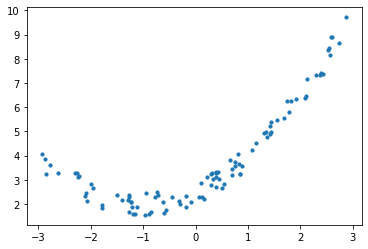

In [3]:
import numpy as np
import matplotlib.pyplot as plt
samples = 100
X = 6*np.random.rand(samples, 1)-3

# Os valores-alvo serão a aplicação de 'X' como argumento de uma função quadrática.
y = 0.5 * (X**2) + X + 2 + np.random.rand(samples,1)

# Como uma linha reta pode nos fornecer um baixo RMSE com esses dados?
plt.scatter(X,y, s=10)

<div> 
    <ul style='font-size:20px'> 
        <li>
            Neste contexto, o scikit-learn tem a classe PolynomialFeatures, que retorna  os dados originais mais cada um dos resultados de sua soma elevada a n (sem os coeficientes).
        </li>
        <li> 
            Por exemplo, com um dataset de duas features (a,b), ao usarmos PolynomialFeatures com degree=2, o valor retornado será, além de a e b, $a^2, ab, b^2 $
        </li>
        <li> 
            Tendo o array inicial n features, o output final da transformação, em função de degree (d), possuirá  $ \frac{(n+d)!}{d!n!}!$ colunas.
        </li>
    </ul>
</div>

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Esta versão extendida de 'X' contém agora 2 features: a original e o seu quadrado.
X_poly[0]

array([-1.78885002,  3.19998439])

In [5]:
# Aplicando um modelo de Regressão Linear.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Pronto! Temos todos os coeficientes de uma função quadrática (axˆ2 + bx +c).
lin_reg.coef_, lin_reg.intercept_

(array([[1.00364043, 0.50491892]]), array([2.49070732]))

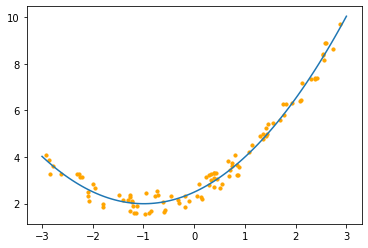

In [6]:
# A hipérbole gerada se adequa muito bem aos dados.
xs = np.linspace(-3,3,101)
xs_poly = poly_features.transform(xs.reshape(-1,1))
ys = lin_reg.predict(xs_poly)
plt.plot(xs, ys)
plt.scatter(X,y, color='orange', s=10)

<h2 style='font-size:30px'> Learning Curves</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Para estudarmos a qualidade do modelo conforme aumentamos o número de instâncias de treino, existem as learning curves. No scikit-learn, uma validação cruzada gradativa ocorrerá. Para cada fold feito, o modelo será treinado em fatias cada vez maiores do conjunto de treino e testado neste e nos dados de validação.
        </li>
    </ul>
</div>

In [7]:
from sklearn.model_selection import learning_curve
# O objeto 'learning_curve' retornará o tamanho da fatia do conjunto de treino e as pontuações de treino e validação.
# Nota: estamos usando a variável independente sem a transformação polinomial!
train_sizes, train_scores, test_scores= learning_curve(lin_reg, X, y, 
                                                       train_sizes=np.linspace(0.01,1,100), random_state=42,
                                                       cv=5, scoring='neg_mean_squared_error')

# Como queremos ter apenas uma visão geral da performance, extrairemos a média das pontuações dos folds com cada tamanho de fatia
# de treino.
train_scores = np.sqrt(-train_scores).mean(axis=1)
test_scores = np.sqrt(-test_scores).mean(axis=1)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 80 instead of 100.
  warnings.warn(


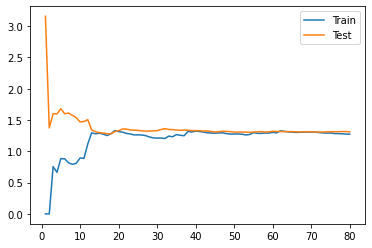

In [8]:
# Plotando as curvas de aprendizado.
plt.plot(train_sizes, train_scores, label='Train')
plt.plot(train_sizes,test_scores, label='Test')
plt.legend()

<p style='color:red'> apagar depois (célula abaixo)

<div> 
    <ul style='font-size:20px'> 
        <li>
            Com poucas instâncias de treino, o modelo tem um baixo índice de erro entre elas, mas um alto valor para o conjunto de teste. Conforme os dados disponíveis crescem,a taxa de erro no treinamento tende a aumentar, enquanto que na validação cai. Em certo ponto, ambas as curvas atingem um plateau, em que não conseguem atingir índices melhores ou piores.
        </li>
    </ul>
</div>

In [9]:
from sklearn.model_selection import learning_curve

# Fazendo o mesmo procedimento com 'X_poly'.
train_sizes_poly, train_scores_poly, test_scores_poly= learning_curve(lin_reg, X_poly, y, 
                                                       train_sizes=np.linspace(0.01,1,100), random_state=42,
                                                       cv=5, scoring='neg_mean_squared_error')

train_scores_poly = np.sqrt(-train_scores_poly).mean(axis=1)
test_scores_poly = np.sqrt(-test_scores_poly).mean(axis=1)

/home/veiga/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 80 instead of 100.
  warnings.warn(


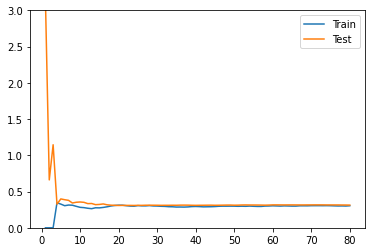

In [10]:
# Veja, o plateau é atingido com uma taxa de erro muito menor!
plt.plot(train_sizes_poly, train_scores_poly, label='Train')
plt.plot(train_sizes_poly,test_scores_poly, label='Test')
plt.ylim([0,3])
plt.legend()

<h2 style='font-size:30px'>  Regularized Linear Models</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
          Os modelos lineares regularizados são versões adapatadas do LinearRegression. O seu intuito é restringir os valores dos coeficientes, evitando assim o vício do algoritmo.
        </li>
        <li> 
          É importante frisar que modelos regularizados costumam exigir que os dados com os quais lidarão estejam normalizados!
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Ridge Regression</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            A regressão Ridge reduz os coeficientes da fórmula. Quanto maior o argumento $\alpha$, mais regularizada ela estará e, assim, mais próximos de 0 esses números estarão.
        </li>
        <li> 
            Podemos fazer essa Regressão usando a equação fechada ou Gradient Descents.
        </li>
    </ul>
</div>

In [11]:
# Closed-form equation.
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.intercept_, ridge_reg.coef_

(array([3.70327526]), array([[1.0159738]]))

In [12]:
# Fazendo por SGD.
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(alpha=1, penalty='l2')

# Converta 'y' para um array 1-D usando 'ravel'.
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.69929064]), array([0.72306181]))

<h3 style='font-size:30px;font-style:italic'> Lasso Regression</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            A Regressão Lasso tende a zerar os coeficientes de variáveis pouco relevantes à previsão.
        </li>
    </ul>
</div>

In [13]:
# Closed-form
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1).fit(X,y.ravel())
lasso_reg.intercept_,lasso_reg.coef_

(3.706524981176245, array([0.97847966]))

In [14]:
# SGD.
sgd_lasso = SGDRegressor(penalty='l1').fit(X, y.ravel())
sgd_lasso.intercept_, sgd_lasso.coef_

(array([3.67633787]), array([1.02826199]))

<h3 style='font-size:30px;font-style:italic'> Elastic Net</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Elastic Net é o meio termo entre a Ridge e Lasso. O seu argumento <em> l1_ratio</em> controla a "personalidade" do algoritmo. Quando 0, o modelo tem o comportamento de uma Regressão Ridge; quando 1, uma Lasso Regression é feita.
        </li>
    </ul>
</div>

In [15]:
from sklearn.linear_model import ElasticNet

# Aqui, 'l1_ratio' faz a ElasticNet ser algo entre uma Ridge e Lasso.
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.intercept_, elastic_net.coef_

(array([3.70648685]), array([0.97891955]))

<h2 style='font-size:30px'>  Early Stopping</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
          Uma estratégia alternativa de aprendizado seria fazer o modelo interromper a sua examinação dos dados assim que a taxa de erro no conjunto de validação comece a subir. Assim, impedimos que o algoritmo sofra um overfitting.
        </li>
        <li> 
            Como as curvas de aprendizado do SGD e mini-batch GD não são regulares, é difícil saber quando o modelo está, de fato, se deteriorando. Nesse sentido, seria conveniente esperar para ver se a tendência de alta da taxa de erro se confirma e, caso o seja, interromper o aprendizado e escalar as configurações que dão a melhor algoritmo.
        </li>
    </ul>
</div>

In [16]:
# Até onde vi, o scikit-learn não oferece um objeto pronto para o Early Stopping. Portanto, teremos que fazer esse método
# por meio de loops.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
# 'clone' criará uma cópia do melhor modelo.
from sklearn.base import clone
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from warnings import filterwarnings
filterwarnings('ignore')
# Criando uma pipeline de tratamento das variáveis independentes.
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(90, include_bias=False)),
    ('std_scaler', StandardScaler())
        ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Agora, fazendo o regressor.
sgd_reg = SGDRegressor(max_iter=1,tol=np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=5e-4)

# Essas variáveis armazenarão informações sobre o melhor modelo criado.
minimum_val_error=float('inf')
best_epoch=None
best_model=None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict.ravel())
    if val_error < minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model = clone(sgd_reg)

# Aqui estão os dados sobre o melhor modelo.
print(f'Minimum Error: {minimum_val_error}')
print(f'Best Epoch: {best_epoch}')
print(f'Best Model: {best_model}')

Minimum Error: 0.11119045093423426
Best Epoch: 999
Best Model: SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=inf, warm_start=True)


<h2 style='font-size:30px'> Logistic Regression</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
          A Regressão Logística, a rigor, computa a probabilidade de uma instância pertencer a uma classe a despeito de outra.
        </li>
        <li> 
            Quando as chances forem maiores ou iguais a 50%, o dado é designado à classe positiva; caso o contrário, à classe negativa.
        </li>
        <li> 
            O formato final da função é um S.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Training and Cost Function</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
          Um bom modelo de Regressão Logística deve retornar um alta probabilidade para instâncias positivas e um valor baixo para as negativas. Afinal de contas, é importante que ele faça as suas previsões com uma taxa de certeza elevada.
        </li>
    </ul>
</div>

<center> 
    <img src='logistic1.png'>
</center>

<h3 style='font-size:30px;font-style:italic'> Decision Boundaries</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
          Vamos construir um modelo de Regressão Linear com o dataset sobre as flores iris a fim de termos uma noção melhor sobre as fronteiras de decisão da Regressão Logística.
        </li>
    </ul>
</div>

In [17]:
# O previsor verificará se a flor é da espécie Virginica ou não apenas com base no comprimento das pétalas.
from sklearn.datasets import load_iris

# Comprimento das pétalas
X = load_iris()['data'][:, 3:]

# Curiosidade: converter um array booleano para o tipo 'integer' transformará os 'Trues' em 1 e 'Falses' em 0
y = (load_iris()['target'] == 2).astype(np.int)

In [18]:
# Montando o modelo.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [19]:
# Agora, como o modelo farás as previsões com base em pétalas de comprimento de 0 a 3 cms?
X_new = np.linspace(0, 3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

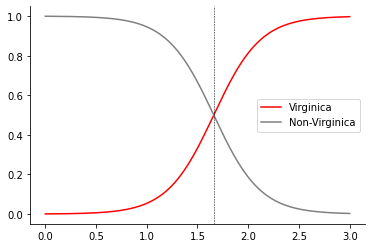

In [20]:
# Plotando as curvas de probabilidade do modelo. A linha vertical sinaliza a fronteira de decisão.
ax = plt.plot(X_new, y_proba[:,1], label='Virginica', c='r')
plt.plot(X_new, y_proba[:,0], label='Non-Virginica', c='grey')
plt.axvline(X_new[np.argmax(y_proba[:,1]>0.5)], lw=0.5, color='k', ls='--')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Text(0.5, 0.6, 'Non-Virginica')

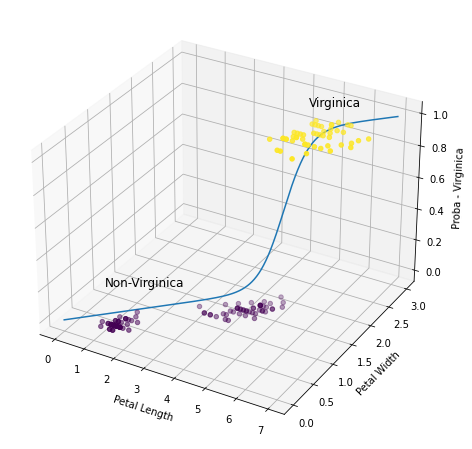

In [124]:
# E se adicionássemos mais uma feature para o previsor? 
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# Comprimento das pétalas
X = load_iris()['data'][:, 2:]
y = (load_iris()['target'] == 2).astype(np.int)

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.array([np.linspace(0,7,1000), np.linspace(0,3 ,1000)]).transpose()
y_proba = log_reg.predict_proba(X_new)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d')
ax.plot(X_new[:,0], X_new[:,1],y_proba[:,1])
ax.scatter(X[:,0], X[:,1], y, c=y, marker='o', cmap='viridis')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Proba - Virginica')
ax.text(5,2.3, 1.1, 'Virginica', c='k', fontsize=12)
ax.text(0.5,0.6, .1, 'Non-Virginica', c='k', fontsize=12)

<div> 
    <ul style='font-size:20px'> 
        <li>
          A Regressão Logística também possui as penalidades l1 e l2. O seu parâmetro de regularização é C (o inverso de alpha); quanto maior o seu valor, menos regularização haverá.
        </li>
    </ul>
</div>

<p style='color:red'> Softmax Regression</p>

In [ ]:
#! mv  /Users/felipeveiga/Desktop/Screen\ Shot\ 2022-05-14\ at\ 16.24.04.png ./gradient_table.png